# Autoregressive Integrated Moving Average with Explanatory Variable (ARIMAX)

The <a href="https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average">ARIMA</a> model is a generalisation of an ARMA model that can be applied to non-stationary time series.

The ARIMAX model is an extended version of ARIMA that includes independent predictor variables.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
matplotlib.rcParams['figure.figsize'] = (16, 9)
pd.options.display.max_columns = 999

## Load Dataset

In [3]:
csp = pd.read_csv('../datasets/california-solar-power.csv', parse_dates=[0])
csp.set_index('LocalTime', inplace=True)
csp = csp.resample('H').mean()
csp.reset_index(inplace=True)
print(csp.shape)
csp.head()

(8760, 406)


,LocalTime,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405
0,2006-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006-01-01 01:00:00,0.0

To keep training times reasonable, we'll only use the last 1000 rows of the dataset.

In [4]:
csp = csp.iloc[-1000:]

In [5]:
test_length = 500
train_length = len(csp) - test_length
three_weeks = 24*7*3

## Define Error Metrics

In [6]:
def calc_MASE(training_series, testing_series, prediction_series):
    n = len(training_series) - 1
    d = np.abs(np.diff(training_series)).sum()/ n
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d


def calc_sMASE(training_series, testing_series, prediction_series, seasonality=24):
    a = training_series.iloc[seasonality:].values
    b = training_series.iloc[:-seasonality].values
    d = np.sum(np.abs(a-b)) / len(a)
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d

## Example ARIMAX Model

Exploration of how ARIMAX models work using a single example time series.

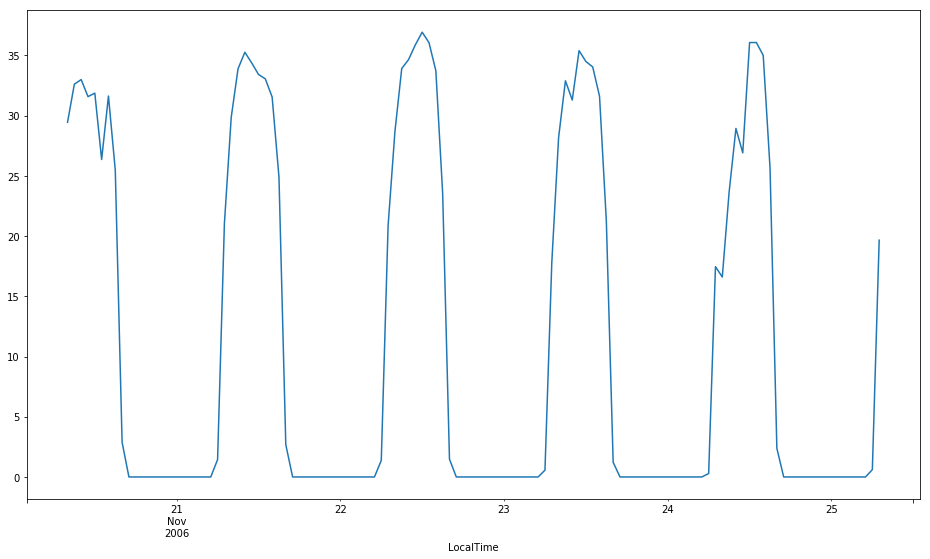

In [7]:
example_solar = 'pv3'
df_ex = csp.set_index('LocalTime').loc[:, example_solar]

# Plot data from first five days
df_ex.iloc[:24*5].plot();

### Time Series Decomposition

Decompose the example time series into trend, seasonal, and residual components.

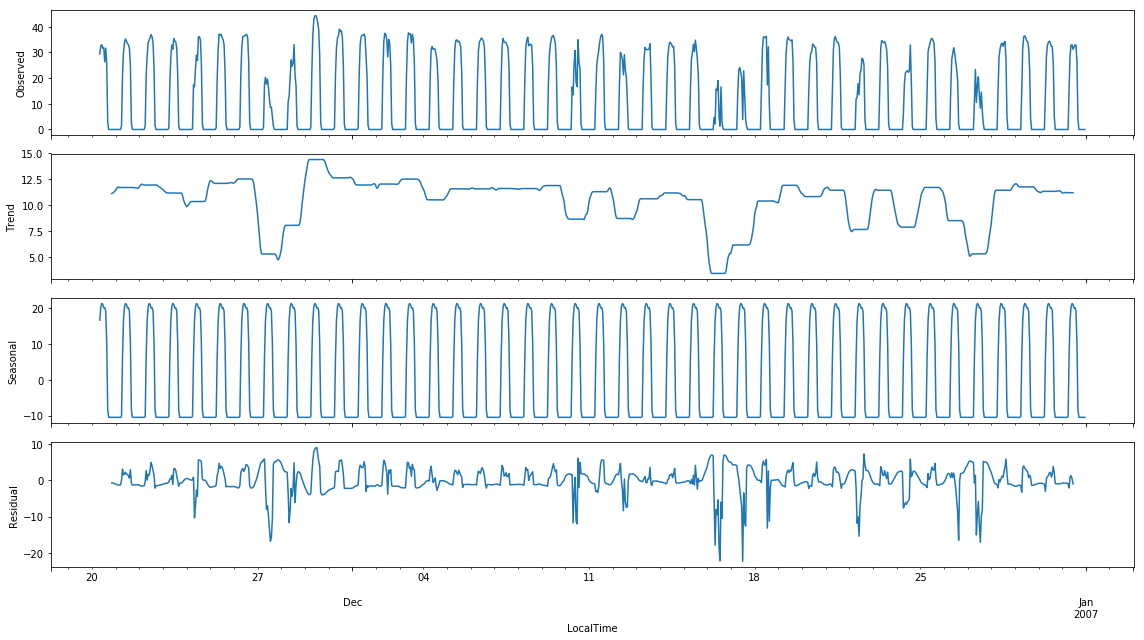

In [8]:
fig = seasonal_decompose(df_ex, model='additive').plot()

There doesn't appear to be a consistent trend. We can run a Dicky-Fuller test to confirm the stationarity.

In [9]:
dftest = adfuller(df_ex, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -3.572130
p-value                          0.006317
#Lags Used                      22.000000
Number of Observations Used    977.000000
Critical Value (5%)             -2.864503
Critical Value (10%)            -2.568348
Critical Value (1%)             -3.437061
dtype: float64

The very low p-value confirms that the data is stationary. We can see that there is daily seasonality, which we will capture as exogenous variables in our ARIMAX model. As there is no trend and we're not considering seasonality directly, we will not difference the time series.

### Plot ACF and PACF

The <a href="https://en.wikipedia.org/wiki/Autocorrelation">Autocorrelation Function</a> (ACF) is the correlation of a signal with a delayed copy of itself as a function of delay.

The <a href="https://en.wikipedia.org/wiki/Partial_autocorrelation_function">Partial Autocorrelation Function</a> (PACF) is the partial correlation of a signal with a delayed copy of itself, controlling for the values of the time series at all shorter delays, as a function of delay.

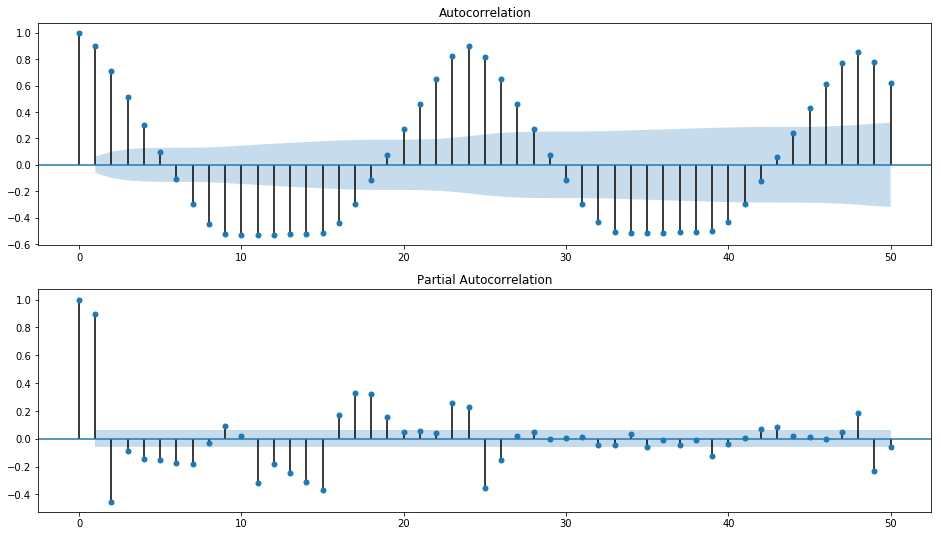

In [10]:
fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(df_ex, lags=50, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(df_ex, lags=50, ax=ax[1])

There is clearly daily seasonality.

### Prepare Data

In [11]:
df_ex = pd.DataFrame(df_ex)
days = df_ex.index.dayofweek
dummy_days = pd.get_dummies(days)
dummy_days.columns = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
dummy_days.index = df_ex.index

df_ex = pd.concat([df_ex, dummy_days], axis=1)
df_ex.head()

,pv3,mon,tue,wed,thu,fri,sat,sun
LocalTime,,,,,,,,
2006-11-20 08:00:00,29.450000,1,0,0,0,0,0,0
2006-11-20 09:00:00,32.608333,1,0,0,0,0,0,0
2006-11-20 10:00:00,32.991667,1,0,0,0,0,0,0
2006-11-20 11:00:00,31.575000,1,0,0,0,0,0,0
2006-11-20 12:00:00,31.866667,1,0,0,0,0,0,0


### Build Model

We will implement grid search to identify optimal parameters for our ARIMAX(p, d, q) model, using the following possible values:

In [12]:
from itertools import product

ps = range(0, 5) # Up to 4 AR terms
ds = range(0, 2) # Either no or first differencing
qs = range(0, 5) # Up to 4 MA terms

params = product(ps, ds, qs)
params_list = list(params)
print("Number of parameter combinations for grid search: {}".format(len(params_list)))

Number of parameter combinations for grid search: 50


In [13]:
def optimiseARIMAX(ts, params_list=params_list, test_length=test_length):
    ts_train = ts.iloc[:-test_length]
    ts_test = ts.iloc[-test_length:]
    
    # We'll select the best model using a holdout validation period of three days
    val_length = 3*24
    ts_train_val = ts.iloc[:-(test_length+val_length)]
    ts_val = ts.iloc[-(test_length+val_length):-test_length]
    
    results = []
    
    for params in params_list:
        p = params[0]
        d = params[1]
        q = params[2]
        
        # try/except loop in case model fails to converge for given parameters
        # We can use SARIMAX model but disregard the seasonal parameters
        try:
            arimax = sm.tsa.SARIMAX(endog=ts_train_val.iloc[:, 0],
                                    exog=ts_train_val.iloc[:, 1:],
                                    freq='H', order=(p, d, q)).fit()
        except:
            continue
        
        # Make predictions for validation holdout set and update best model if necessary
        val_pred = arimax.predict(start=ts_val.index[0],
                                  end=ts_val.index[-1],
                                  exog=ts_val.iloc[:, 1:],
                                  dynamic=True)
        sMASE = calc_sMASE(ts_train.iloc[:, 0], ts_val.iloc[:, 0], val_pred)

        results.append([params, sMASE])
            
    df_results = pd.DataFrame(results)
    df_results.columns = ['parameters', 'sMASE']
    df_results = df_results.sort_values(by='sMASE', ascending=True).reset_index(drop=True)
    
    # Retrain model with best parameters using all training data and generate test forecast
    # Use loop to fall back to next best model in case training fails using full dataset
    trained = False
    model_rank = 1
    while not trained:
        train_params = df_results.iloc[model_rank-1, 0]
        try:
            arimax = sm.tsa.SARIMAX(endog=ts_train.iloc[:, 0],
                                    exog=ts_train.iloc[:, 1:],
                                    freq='H', order=train_params).fit()
            trained = True
        except:
            model_rank += 1
        
    summary = arimax.summary()
    
    # Start index must be greater than q. We will fill the missing initial entries with zeroes
    fcst = arimax.predict(start=ts_train.index[train_params[2]+1],
                          end=ts_test.index[-1],
                          exog=ts_test.iloc[:, 1:])
    fcst = np.concatenate([np.array([0 for i in range(train_params[2]+1)]), fcst])
    fcst = pd.DataFrame(data=fcst, index=ts.index, columns=['%s_pred' % ts.columns[0]])
    
    return fcst, train_params, summary

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%%time
fcst, train_params, summary = optimiseARIMAX(df_ex)
df_ex = pd.concat([df_ex, fcst], axis=1)
print("Best model: ARIMAX{}".format(train_params))
print(summary)

Best model: ARIMAX(2, 0, 4)
                           Statespace Model Results                           
Dep. Variable:                    pv3   No. Observations:                  500
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -1522.270
Date:                Mon, 03 Sep 2018   AIC                           3072.541
Time:                        23:46:49   BIC                           3131.545
Sample:                    11-20-2006   HQIC                          3095.694
                         - 12-11-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mon            8.7860      1.172      7.494      0.000       6.488      11.084
tue           10.3137      1.176      8.774      0.000       8.010      12.618
wed           12.7212   

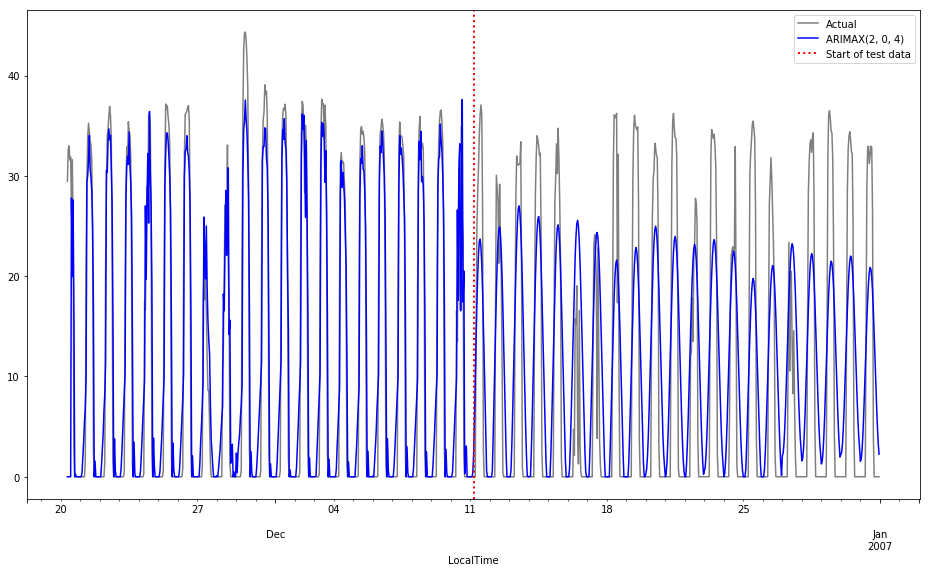

In [16]:
# Example forecast
fcst0 = df_ex.copy()
fcst0['%s_pred' % example_solar][fcst0['%s_pred' % example_solar] < 0] = 0

fcst0[example_solar].plot(label='Actual', c='k', alpha=0.5)
fcst0['%s_pred' % example_solar].plot(label='ARIMAX%s' % str(train_params), c='b')
plt.axvline(x=fcst0.index[-test_length], linestyle=':', linewidth=2, color='r', label='Start of test data')
plt.legend();

## Evaluating ARIMAX

To evaluate ARIMAX, we will generate forecasts for each time series using the grid search methodology shown above (with subsequent zeroing of the negative values). MASE and sMASE will be calculated for each individual time series, and the mean of all these scores will be used as overall accuracy metrics for ARIMAX on this dataset.

In [17]:
parameters = []
results = csp.copy()
results['training'] = 0
results['training'][:-test_length] = 1

tic = time()
for i, col in enumerate(csp.columns[1:]):
    if i % 10 == 0:
        toc = time()
        print("Running predictions for {}. Cumulative time: {:.1f} minutes.".format(col, (toc-tic)/60))
        
    # Prepare DataFrame for selected column
    df = csp.set_index('LocalTime').loc[:, col]
    df = pd.DataFrame(df)
    days = df.index.dayofweek
    dummy_days = pd.get_dummies(days)
    dummy_days.columns = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    dummy_days.index = df.index
    df = pd.concat([df, dummy_days], axis=1)
    
    # Find best model
    fcst, train_params, summary = optimiseARIMAX(df)
    # Add predictions to results DataFrame
    results['%s_pred' % col] = fcst.values
    # Store model parameteres for reference
    parameters.append(train_params)

toc = time()
print("Finished! Total run time: {:.1f} minutes.".format((toc-tic)/60))

Running predictions for pv1. Cumulative time: 0.0 minutes.
Running predictions for pv11. Cumulative time: 4.7 minutes.
Running predictions for pv21. Cumulative time: 9.4 minutes.
Running predictions for pv31. Cumulative time: 14.1 minutes.
Running predictions for pv41. Cumulative time: 19.1 minutes.
Running predictions for pv51. Cumulative time: 24.1 minutes.
Running predictions for pv61. Cumulative time: 28.8 minutes.
Running predictions for pv71. Cumulative time: 33.8 minutes.
Running predictions for pv81. Cumulative time: 38.9 minutes.
Running predictions for pv91. Cumulative time: 44.1 minutes.
Running predictions for pv101. Cumulative time: 49.4 minutes.
Running predictions for pv111. Cumulative time: 54.9 minutes.
Running predictions for pv121. Cumulative time: 60.2 minutes.
Running predictions for pv131. Cumulative time: 66.0 minutes.
Running predictions for pv141. Cumulative time: 71.6 minutes.
Running predictions for pv151. Cumulative time: 77.6 minutes.
Running predictions fo

In [18]:
results.head()

,LocalTime,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405,training,pv1_pred,pv2_pred,pv3_pred,pv4_pred,pv5_pred,pv6_pred,pv7_pred,pv8_pred,pv9_pred,pv10_pred,pv11_pred,pv12_pred,pv13_pred,pv14_pred,pv15_pred,pv16_pred,pv17_pred,pv18_pred,pv19_pred,pv20_pred,pv21_pred,pv22_pred,pv23_pred,pv24_pred,pv25_pred,pv26_pred,pv27_pred,pv28_pred,pv29_pred,pv30_pred,pv31_pred,pv32_pred,pv33_pred,pv34_pred,pv35_pred,pv36_pred,pv37_pred,pv38_pred,pv39_pred,pv40_pred,pv41_pred,pv42_pred,pv43_pred,pv44_pred,pv45_pred,pv46_pred,pv47_pred,pv48_pred,pv49_pred,pv50_pred,pv51_pred,pv52_pred,pv53_pred,pv54_pred,pv55_pred,pv56_pred,pv57_pred,pv58_pred,pv59_pred,pv60_pred,pv61_pred,pv62_pred,pv63_pred,pv64_pred,pv65_pred,pv66_pred,pv67_pred,pv68_pred,pv69_pred,pv70_pred,pv71_pred,pv72_pred,pv73_pred,pv74_pred,pv75_pred,pv76_pred,pv77_pred,pv78_pred,pv79_pred,pv80_pred,pv81_pred,pv82_pred,pv83_pred,pv84_pred,pv85_pred,pv86_pred,pv87_pred,pv88_pred,pv89_pred,pv90_pred,pv91_pred,pv92_pred,pv93_pred,pv94_pred,pv95_pred,pv96_pred,pv97_pred,pv98_pred,pv99_pred,pv100_pred,pv101_pred,pv102_pred,pv103_pred,pv104_pred,pv105_pred,pv106_pred,pv107_pred,pv108_pred,pv109_pred,pv110_pred,pv111_pred,pv112_pred,pv113_pred,pv114_pred,pv115_pred,pv116_pred,pv117_pred,pv118_pred,pv119_pred,pv120_pred,pv121_pred,pv122_pred,pv123_pred,pv124_pred,pv125_pred,pv126_pred,pv127_pred,pv128_pred,pv129_pred,pv130_pred,pv131_pred,pv132_pred,pv133_pred,pv134_pred,pv135_pred,pv136_pred,pv137_pred,pv138_pred,pv139_pred,pv140_pred,pv141_pred,pv142_pred,pv143_pred,pv144_pred,pv145_pred,pv146_pred,pv147_pred,pv148_pred,pv149_pred,pv150_pred,pv151_pred,pv152_pred,pv153_pred,pv154_pred,pv155_pred,pv156_pred,pv157_pred,pv158_pred,pv159_pred,pv160_pred,pv161_

In [19]:
results0 = results.iloc[:, 1:].copy()
results0[results0 < 0] = 0
results0['LocalTime'] = results['LocalTime']

In [20]:
MASEs = []
sMASEs = []
for col in csp.columns[1:]:
    MASEs.append(calc_MASE(results0[col].iloc[-(test_length+three_weeks):-test_length],
                           results0[col].iloc[-test_length:],
                           results0['%s_pred' % col].iloc[-test_length:]))
    sMASEs.append(calc_sMASE(results0[col].iloc[-(test_length+three_weeks):-test_length],
                             results0[col].iloc[-test_length:],
                             results0['%s_pred' % col].iloc[-test_length:]))

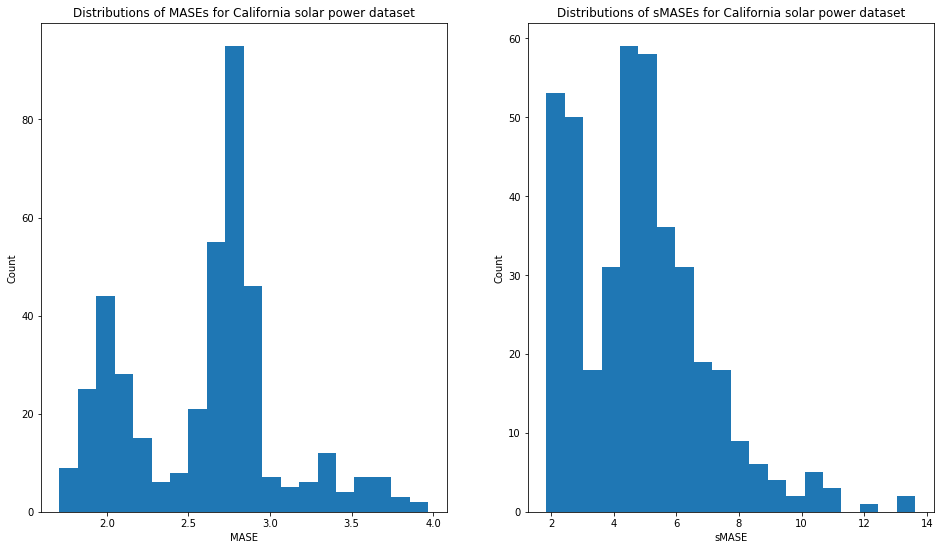

In [21]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(MASEs, bins=20)
ax[0].set_title('Distributions of MASEs for California solar power dataset')
ax[0].set_xlabel('MASE')
ax[0].set_ylabel('Count')
ax[1].hist(sMASEs, bins=20)
ax[1].set_title('Distributions of sMASEs for California solar power dataset')
ax[1].set_xlabel('sMASE')
ax[1].set_ylabel('Count');

In [22]:
MASE = np.mean(MASEs)
sMASE = np.mean(sMASEs)
print("Overall MASE: {:.4f}".format(MASE))
print("Overall sMASE: {:.4f}".format(sMASE))

Overall MASE: 2.6009
Overall sMASE: 4.8416


Show some example forecasts.

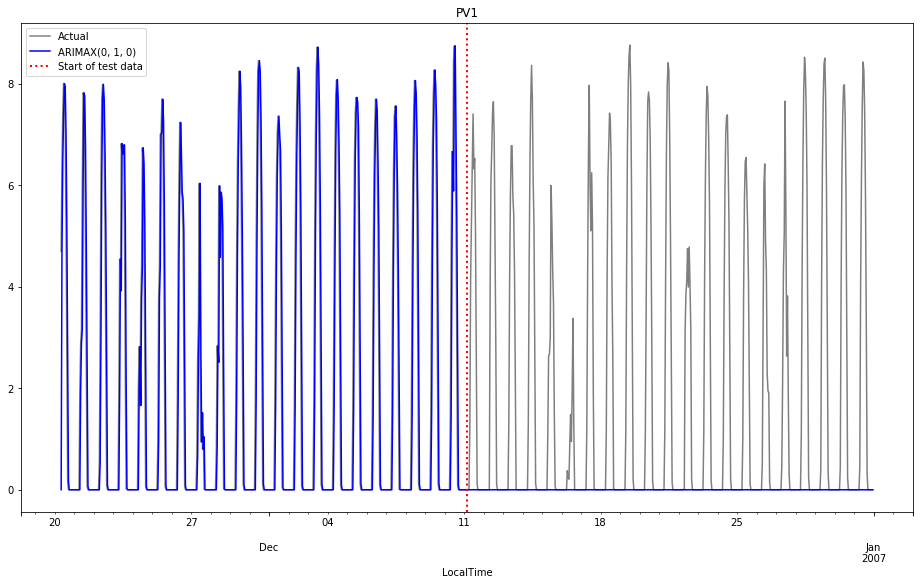

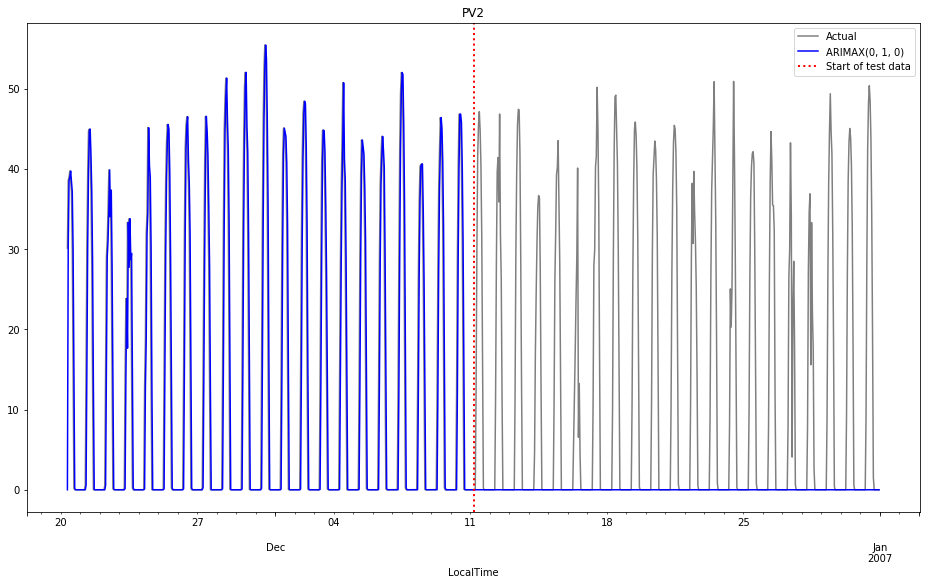

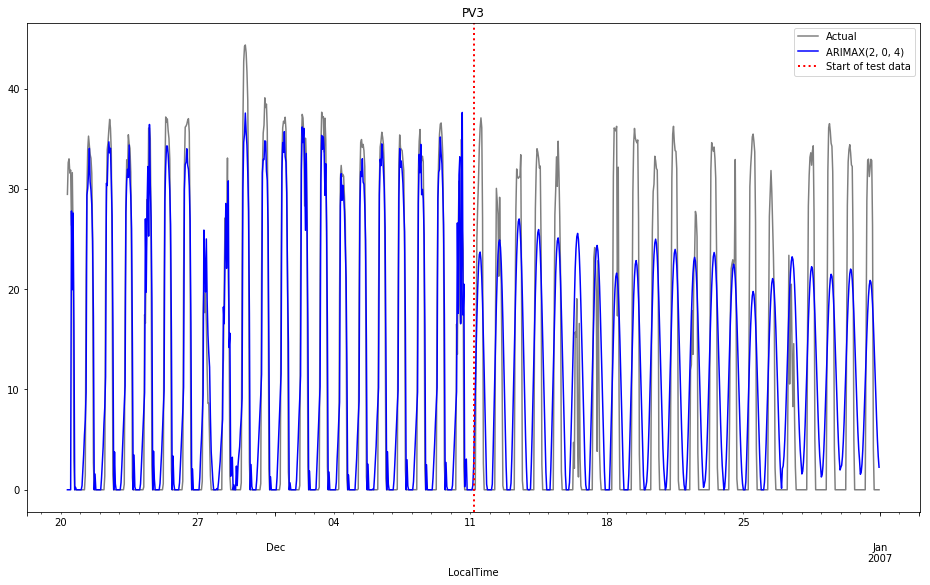

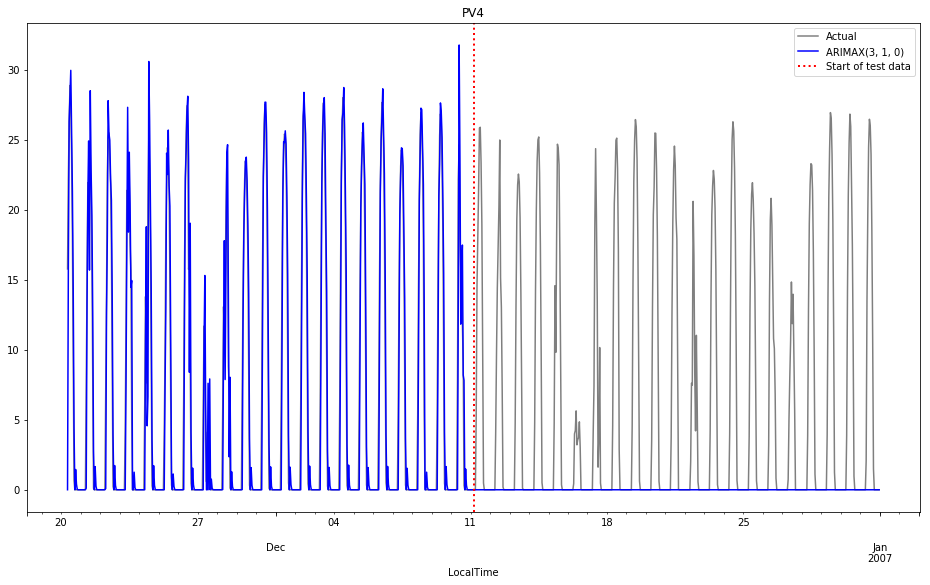

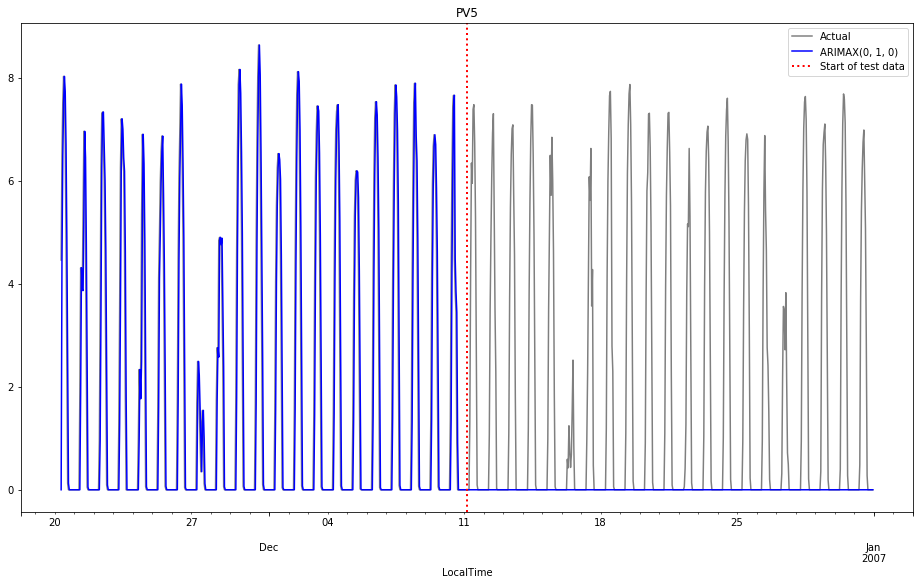

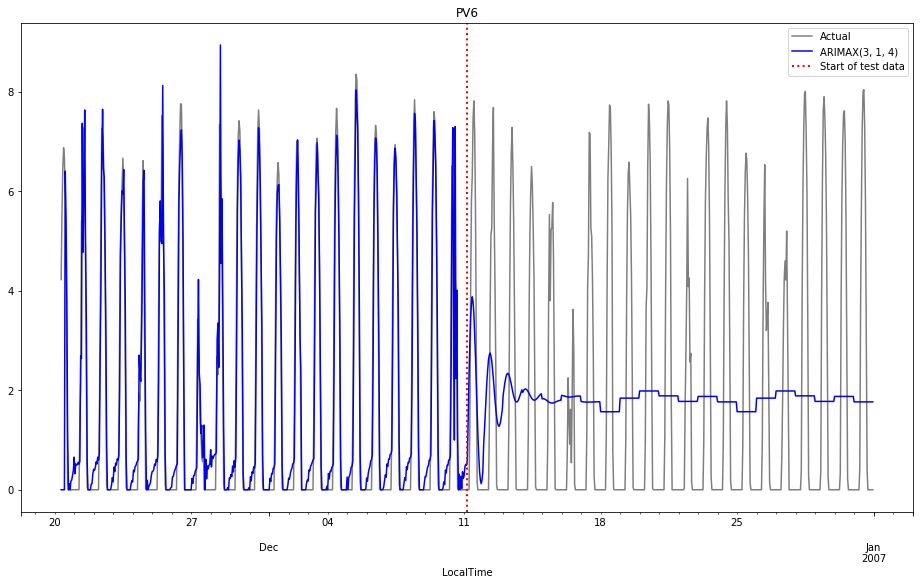

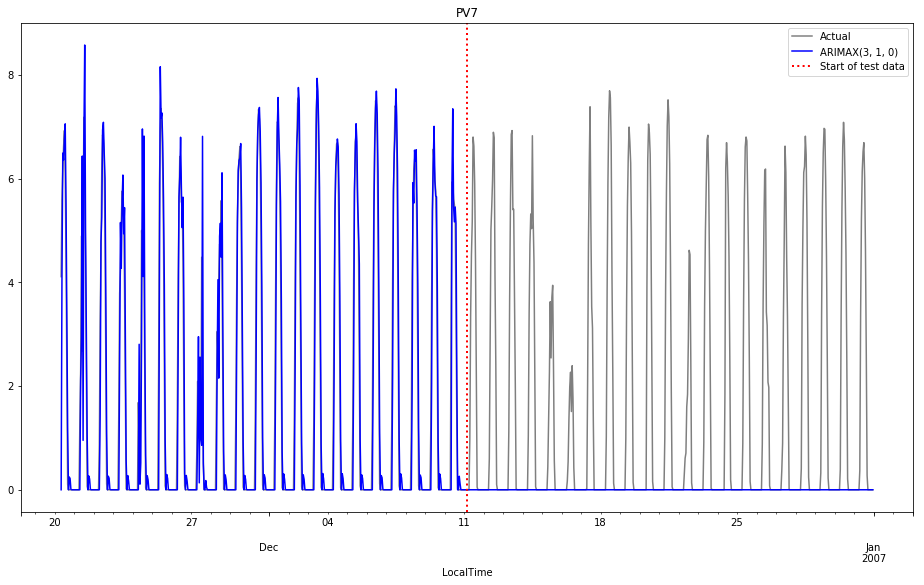

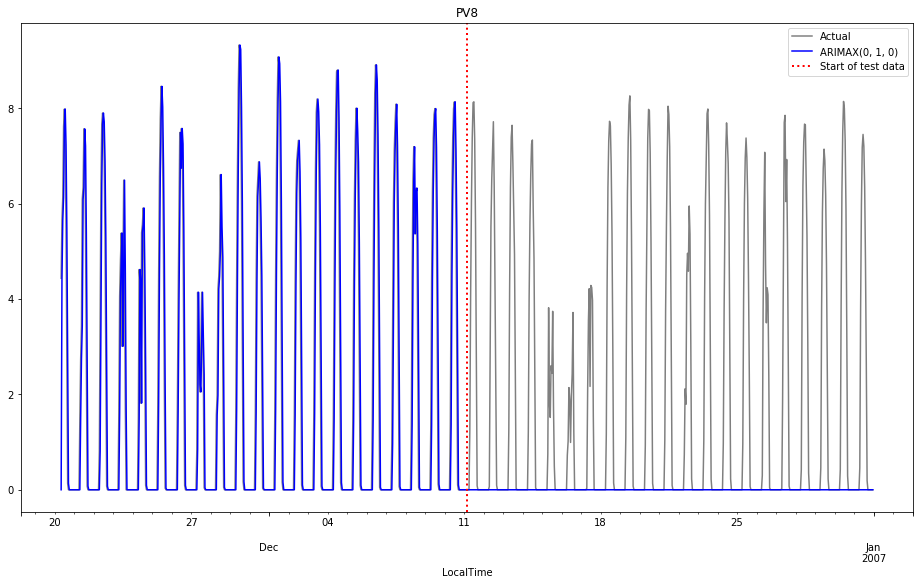

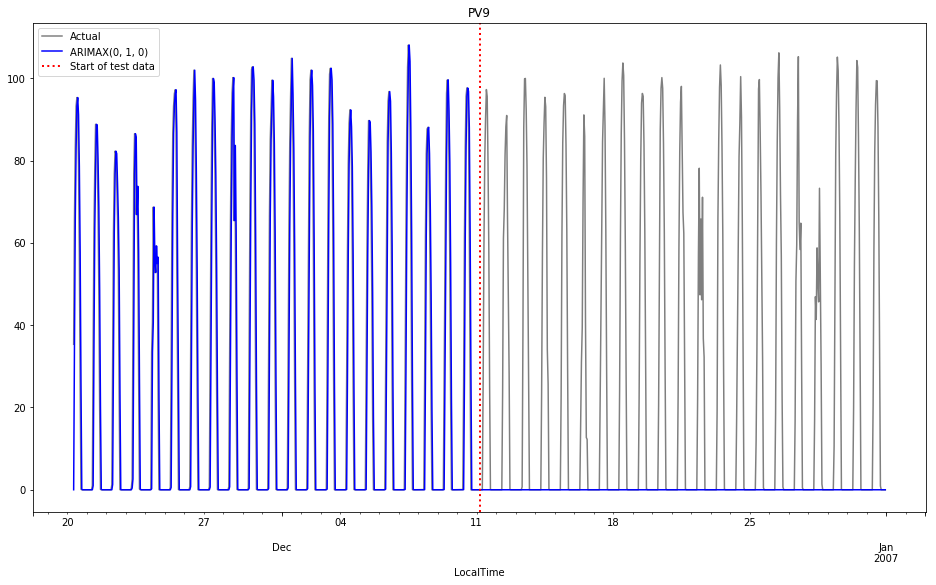

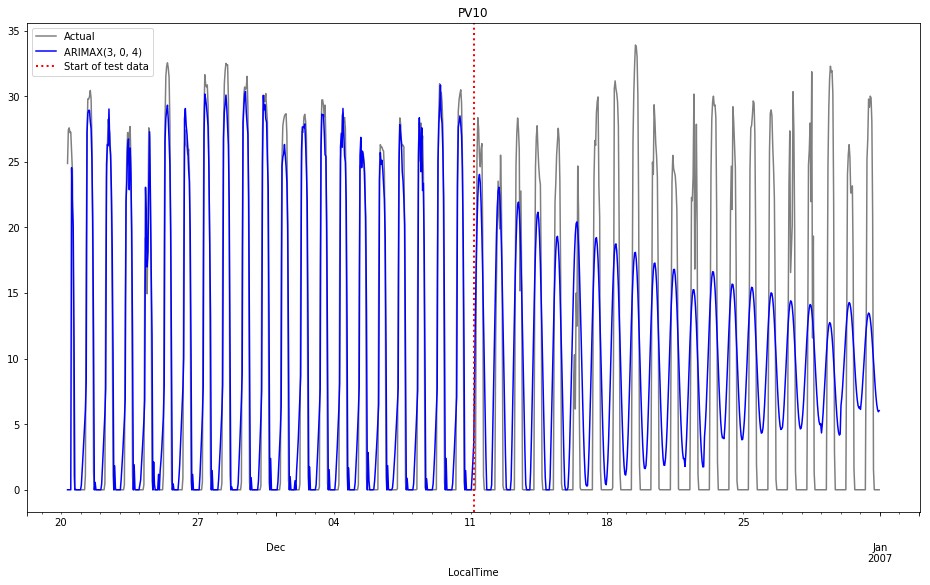

In [23]:
results_d = results0.set_index('LocalTime')

for solar in range(1, 11):
    results_d['pv%s' % solar].plot(label='Actual', c='k', alpha=0.5)
    results_d['pv%s_pred' % solar].plot(label='ARIMAX%s' % str(parameters[solar-1]), c='b')
    plt.axvline(x=results_d.index[-test_length], linestyle=':', linewidth=2, color='r', label='Start of test data')
    plt.legend()
    plt.title('PV%s' % solar)
    plt.show();

Clearly, many of the time series adopt an ARIMAX models that just flatline at zero for the test period. The higher order models appear to do a better job of generating forecasts, although when such a large number of data points are zero, always forecasting zero is presumably a strategy that performs quite well.

Store the accuracy scores for the ARIMAX models.

In [24]:
import pickle
  
with open('csp-MASE.pkl', 'wb') as f:
    pickle.dump(MASE, f)
    
with open('csp-sMASE.pkl', 'wb') as f:
    pickle.dump(sMASE, f)

Store the predictions and parameters.

In [25]:
with open('../_results/ARIMAX/csp-results.pkl', 'wb') as f:
    pickle.dump(results0, f)
    
with open('../_results/ARIMAX/csp-parameters.pkl', 'wb') as f:
    pickle.dump(parameters, f)